# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
X = df.iloc[:, [0]].values
y = df.iloc[:, 1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Simple Linear Regression model on the Training set

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predicting the Test set results

In [7]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

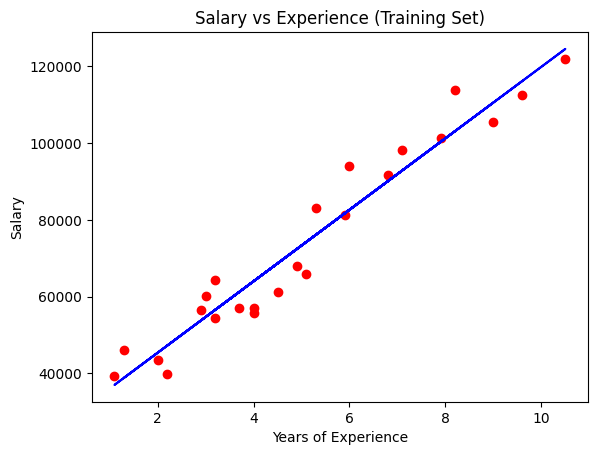

In [8]:
plt.scatter(sc.inverse_transform(X_train), y_train, color="red")
plt.plot(sc.inverse_transform(X_train), regressor.predict(X_train), color="blue")
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## Visualising the Test set results

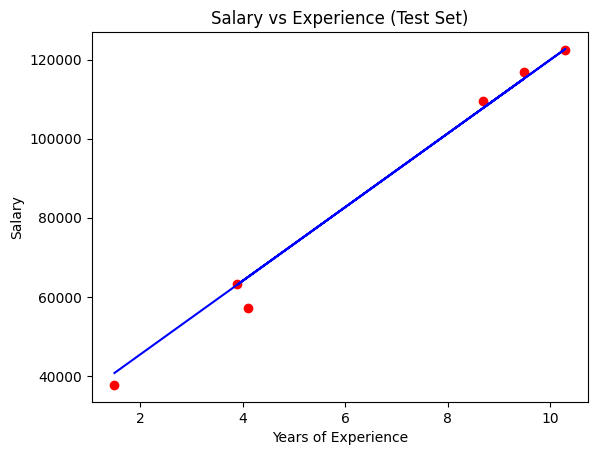

In [9]:
plt.scatter(sc.inverse_transform(X_test), y_test, color="red")
plt.plot(sc.inverse_transform(X_test), y_pred, color="blue")
plt.title("Salary vs Experience (Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## Excercise

Question 1: How do I use my simple linear regression model to make a single prediction, for example, to predict the salary of an employee with 12 years of experience?

In [10]:
regressor.predict(sc.transform([[12]]))

array([138531.00067138])

Question 2: How do I get the final regression equation y = b0 + b1 x with the final values of the coefficients b0 and b1?

In [11]:
real_coef = regressor.coef_ / sc.scale_
real_intercept = regressor.intercept_ - sc.mean_.dot(real_coef)

In [12]:
f"Salary = {real_coef[0]} * Years of Experience + {real_intercept}"

'Salary = 9312.575126729187 * Years of Experience + 26780.099150628186'